In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score 
from sklearn.neural_network import MLPRegressor

In [9]:
df=pd.read_csv('soc-train.csv',index_col=None)
df_test=pd.read_csv('soc-test.csv')

In [10]:
df

,cycle,time,current,voltage,temp,soc
0,2.0,0.003472,0.846701,2.096645,32.137800,0.000375
1,2.0,0.006208,2.143512,2.296176,32.137800,0.000456
2,2.0,0.008604,3.342942,2.508365,32.137800,0.000456
3,2.0,0.011253,4.657011,2.661769,32.138710,0.000456
4,2.0,0.024958,5.387708,2.779442,32.146900,0.097873
...,...,...,...,...,...,...
471366,703.0,47.564647,-0.117412,2.000054,33.476419,0.366148
471367,703.0,48.115019,-0.098537,1.999940,33.263882,0.267107
471368,703.0,48.590396,-0.085274,1.999947,33.109255,0.194576
471369,703.0,49.074073,-0.074050,2.000156,32.930281,0.130391


In [11]:
x_train=df[df.columns[0:5]]
y_train=df[['soc']]
y_train=np.array(y_train).reshape(-1)

In [12]:
x_train

,cycle,time,current,voltage,temp
0,2.0,0.003472,0.846701,2.096645,32.137800
1,2.0,0.006208,2.143512,2.296176,32.137800
2,2.0,0.008604,3.342942,2.508365,32.137800
3,2.0,0.011253,4.657011,2.661769,32.138710
4,2.0,0.024958,5.387708,2.779442,32.146900
...,...,...,...,...,...
471366,703.0,47.564647,-0.117412,2.000054,33.476419
471367,703.0,48.115019,-0.098537,1.999940,33.263882
471368,703.0,48.590396,-0.085274,1.999947,33.109255
471369,703.0,49.074073,-0.074050,2.000156,32.930281


In [13]:
x_test=df_test[df_test.columns[0:5]]
y_test=df_test[['soc']]
y_test=np.array(y_test).reshape(-1)

In [14]:
def correct(y):
    for i in range(len(y)):
        if(y[i]>100):
            y[i]=100
        if(y[i]<0):
            y[i]=0
    return y
    

In [15]:
def evaluate(model):
    #model.fit(x_train,y_train)
    p_train=model.predict(x_train)
    p_test=model.predict(x_test)
    p_test=p_test.reshape(-1)
    p_test=correct(p_test)
    p_train=p_train.reshape(-1)
    p_train=correct(p_train)
    print("Training data")
    print('r2:',"%.2f"%r2_score(p_train,y_train))
    per=(np.sqrt(mse(p_train,y_train))/100)*100
    print("Error :","%.2f"%per,"%")
    print("Max_error:","%.2f"%max(np.abs(y_train-p_train)))
    
    print("\nTest data")
    print('r2:',"%.2f"%r2_score(p_test,y_test))
    per=(np.sqrt(mse(p_test,y_test))/100)*100
    print("Error  :","%.2f"%per,"%")
    print("Max_error:","%.2f"%max(np.abs(y_test-p_test)))
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title('Train data plot')
 
    ax1.scatter(y_train,p_train)
    ax1.plot([0,1],[0,1], transform=ax1.transAxes)
    ax2.set_title('Test data plot')

    ax2.scatter(y_test,p_test)
    ax2.plot([0,1],[0,1], transform=ax2.transAxes)
    plt.show()

In [16]:
model=MLPRegressor(hidden_layer_sizes=[20,10],max_iter=600,activation='relu')
model.fit(x_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[20, 10], learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=600,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Training data
r2: 1.00
Error : 1.72 %
Max_error: 44.68

Test data
r2: 0.99
Error  : 2.84 %
Max_error: 31.27


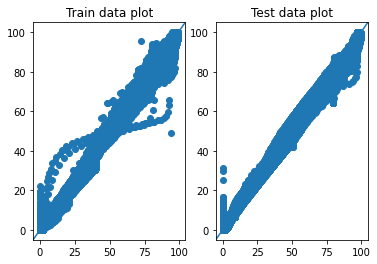

In [9]:
evaluate(model)

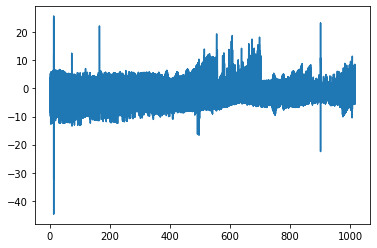

In [10]:
plt.plot(x_train['cycle'],model.predict(x_train)-y_train)

(-20.0, 20.0)

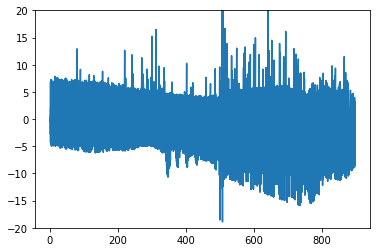

In [11]:
plt.plot(x_test['cycle'],model.predict(x_test)-y_test)
plt.ylim(-20,20)

In [12]:
p_train=model.predict(x_train)

In [13]:
a=np.abs(p_train-y_train)>20

In [14]:
x_train[a]

,cycle,time,current,voltage,temp
1236,13.0,316.862944,-2.499887,3.277378,30.182378
1237,13.0,439.636770,-3.959911,3.230166,30.078600
1238,13.0,440.044220,-3.999911,3.181836,30.164836
1239,13.0,440.611670,-3.999948,3.164260,30.338687
1240,13.0,441.195790,-3.999908,3.155570,30.546869
1241,13.0,441.796460,-3.999976,3.148545,30.768430
1255,13.0,449.938920,-4.000075,3.000739,32.888869
1256,13.0,450.531090,-3.999959,2.975075,33.089494
1257,13.0,451.040000,-4.000010,2.945197,33.311030
1258,13.0,451.653590,-3.999963,2.890233,33.583027


In [15]:
p_train[a]

array([63.24211764, 59.44453351, 56.51376258, 55.37671984, 54.6806829 ,
       54.05877657, 43.87178347, 42.26506227, 40.39832127, 37.11454175,
       33.66743976, 28.9727435 , 22.33443706, 49.07902863, 65.9093721 ,
       57.45052445, 55.50534844, 54.54742981, 53.90356297, 53.26911814,
       41.9174703 , 40.34763815, 38.5181472 , 35.07089568, 30.86275515,
       26.67598477, 95.7234403 , 60.69126799, 56.66005058, 53.87196007])